In [5]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import feather
import requests
import requests_cache
import lxml
from bs4 import BeautifulSoup
import bs4
import re
%matplotlib inline
#plt.rcParams['figure.figsize'] = (12,12)

In [ ]:
#%%timeit -r1 -n1 
# timeit args from: http://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook 
# For some reason the varible isn't saved when using timeit

# Note: To just read in part add nrows =
parseDates = ["Opened", "Closed", "Updated"] # Convert these to datetimes
street_csv = pd.read_csv("Street_and_Sidewalk_Cleaning.csv", 
                         #nrows = 100000,
                         parse_dates=parseDates)


In [ ]:
feather.write_dataframe(street_csv, 'street.feather')

In [ ]:
# Similar thing built in to pandas. Causes some error.
street.to_hdf('street.h5','table',append=False)

In [2]:
#street2 = pd.read_hdf('street.h5')

In [3]:
street = feather.read_dataframe('street.feather')

In [4]:
# To use the csv version
# street = street_csv

In [6]:
#all(street == street_csv)

In [3]:
street.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point
0,322566,2008-11-30 22:56:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,"1566 HYDE ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,3.0,Nob Hill,2009-07-21 16:24:00,"(37.795328529, -122.418067787)"
1,322560,2008-11-30 22:24:00,2009-07-21 16:24:00,Closed,DPW Ops Queue,Intersection of TAYLOR ST and TURK ST,Street and Sidewalk Cleaning,Illegal_Dumping,Garbage,Voice In,6.0,Downtown/Civic Center,2009-07-21 16:24:00,"(37.7832142923006, -122.410764953722)"
2,322559,2008-11-30 22:20:00,2008-12-01 06:07:00,Closed,DPW Ops Queue,"1601 SACRAMENTO ST, SAN FRANCISCO, CA, 94109",Street and Sidewalk Cleaning,Illegal_Dumping,Mattress,Voice In,3.0,Nob Hill,2008-12-01 06:07:00,"(37.791643509125, -122.419260423291)"
3,322556,2008-11-30 21:34:00,2008-12-09 08:07:00,Closed,DPW Ops Queue,Intersection of 25TH ST and LUCKY ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,9.0,Mission,2008-12-09 08:07:00,"(37.7509362479361, -122.413364630104)"
4,322545,2008-11-30 20:45:00,2009-02-03 07:09:00,Closed,DPW Ops Queue,Intersection of 19TH ST and OAKWOOD ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Empty_cart,Voice In,8.0,Mission,2009-02-03 07:09:00,"(37.7598935230725, -122.42486308879)"


In [37]:
street = street.loc[street['Opened'].dt.year != 2008]
street = street.loc[street['Opened'].dt.year != 2017]
street = street.sort_values("Opened")
street = street.reset_index()
street = street.drop('index', 1)
street.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point,month
0,342509,2009-01-01 08:30:51,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of 13TH ST and FOLSOM ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Encampment,Voice In,6.0,Mission,2009-01-01 11:07:06,"(37.7695911772607, -122.415577110949)",1
1,342510,2009-01-01 08:33:46,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of 13TH ST and FOLSOM ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Debris_filled_carts,Voice In,6.0,Mission,2009-01-01 11:07:06,"(37.7695911772607, -122.415577110949)",1
2,342512,2009-01-01 08:44:54,2009-01-31 13:09:53,Closed,DPW Ops Queue,"467 FILLMORE ST, SAN FRANCISCO, CA, 94117",Street and Sidewalk Cleaning,Street_Cleaning,Glass,Voice In,5.0,Western Addition,2009-01-31 13:09:53,"(37.773807246, -122.431027495)",1
3,342514,2009-01-01 09:13:07,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of DWIGHT ST and GOETTINGEN ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,9.0,Excelsior,2009-01-01 11:07:06,"(37.7232896018615, -122.405086927628)",1
4,342519,2009-01-01 09:21:05,2009-01-21 06:07:13,Closed,DPW Ops Queue,"1610 MCALLISTER ST, SAN FRANCISCO, CA, 94115",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,5.0,Western Addition,2009-01-21 06:07:13,"(37.777956377, -122.43893262)",1


Some basic statistics on the dataset we are starting with:

In [50]:
numRows = street.shape[0]
print "We are working with", numRows, "rows."
print "Our dates range from", street.loc[numRows - 1, "Opened"],"to", street.loc[0, "Opened"], "."

We are working with 693612 rows.
Our dates range from 2016-12-31 22:59:11 to 2009-01-01 08:30:51 .


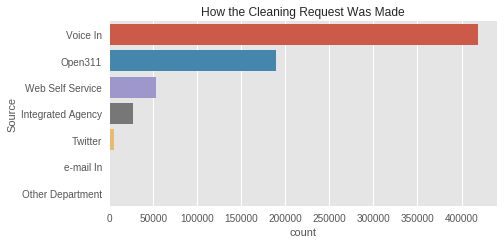

In [91]:
#plt.figure(figsize=(2,100)) # Doesn't do much
theOrder = ["Voice In", "Open311", "Web Self Service", "Integrated Agency", "Twitter", "e-mail In", "Other Department"]
#sns.set(font_scale = 1.5)
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Source", data = street, kind = "count", orient = "h", order = theOrder, aspect = 2)#, size = 10)
plt.title("How the Cleaning Request Was Made") 
plt.show()

According to [the project's website](http://www.open311.org/learn/), Open311 allows people to report issues in public spaces to city officials through a [website](https://sf311.org/index.aspx?page=797) or [mobile app](https://www.sf311.org/mobile).  

In [52]:
street.Neighborhood.unique()

array(['Mission', 'Western Addition', 'Excelsior', 'Inner Richmond',
       'Bernal Heights', 'Downtown/Civic Center', 'Chinatown',
       'Haight Ashbury', 'Bayview', 'Nob Hill', 'Castro/Upper Market',
       'South of Market', 'Outer Richmond', 'Marina', 'Outer Sunset',
       'Inner Sunset', 'Parkside', 'Ocean View', 'Russian Hill',
       'Visitacion Valley', 'Golden Gate Park', 'Noe Valley',
       'Outer Mission', 'Potrero Hill', 'Presidio Heights', 'Seacliff',
       'West of Twin Peaks', 'Crocker Amazon', 'North Beach',
       'Financial District', 'Glen Park', 'Lakeshore', 'Pacific Heights',
       None, 'Twin Peaks', 'Diamond Heights', 'Presidio', 'Merced Heights',
       'Ingleside', 'Treasure Island/YBI', 'Sutro Heights',
       'Cathedral Hill', 'Oceanview', 'Golden Gate Heights',
       'Dolores Heights', "St. Mary's Park", 'Sherwood Forest',
       'Tenderloin', 'Lone Mountain', 'Hayes Valley', 'Duboce Triangle',
       'Civic Center', 'Mission Dolores', 'Lincoln Park / 

In [53]:
street.Neighborhood.value_counts

<bound method Series.value_counts of 0                              Mission
1                              Mission
2                     Western Addition
3                            Excelsior
4                     Western Addition
5                       Inner Richmond
6                       Bernal Heights
7                Downtown/Civic Center
8                       Bernal Heights
9                            Chinatown
10                      Haight Ashbury
11                           Chinatown
12                             Mission
13                      Haight Ashbury
14                      Haight Ashbury
15                      Haight Ashbury
16                             Bayview
17                             Bayview
18                            Nob Hill
19                             Bayview
20                             Bayview
21                           Excelsior
22                           Excelsior
23                             Bayview
24                         

In [54]:
# From: http://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column
counts = street.groupby('Neighborhood').count()

We can get the total number of cases from CaseID
unresolved cases by neighborhood

In [55]:
counts = counts.sort_values(by = "CaseID",
                            ascending = False)
counts = counts.reset_index()

In [56]:
counts.head()

,Neighborhood,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Updated,Point,month
0,Mission,96712,96712,95382,96712,96712,96712,96712,96700,96698,96712,96712,96712,96712,96712
1,South of Market,65269,65269,64275,65269,65269,65269,65269,65263,65263,65269,65269,65269,65269,65269
2,Tenderloin,28495,28495,28059,28495,28495,28495,28495,28494,28494,28495,28495,28495,28495,28495
3,Downtown/Civic Center,26426,26426,26389,26426,26426,26426,26426,26426,26425,26426,26426,26426,26426,26426
4,Bayview,25956,25956,25658,25956,25956,25956,25956,25956,25955,25956,25956,25956,25956,25956


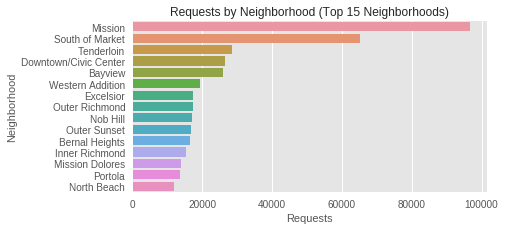

In [57]:
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(x = "CaseID", 
                    y = "Neighborhood",
                    data = counts.head(15), 
                    kind = "bar", 
                    orient = "h", 
                    aspect = 2
                   )#, size = 10)
ax.set_xlabels("Requests")
plt.title("Requests by Neighborhood (Top 15 Neighborhoods)") 
plt.show()

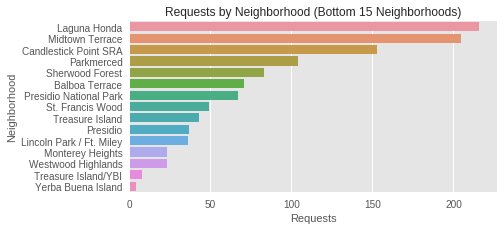

In [58]:
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(x = "CaseID", 
                    y = "Neighborhood",
                    data = counts.tail(15), 
                    kind = "bar", 
                    orient = "h", 
                    aspect = 2
                   )#, size = 10)
ax.set_xlabels("Requests")
plt.title("Requests by Neighborhood (Bottom 15 Neighborhoods)") 
plt.show()

In [59]:
counts['UnclosedProp'] = (counts.Opened - counts.Closed) / counts.Opened

In [60]:
counts.head()

,Neighborhood,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Updated,Point,month,UnclosedProp
0,Mission,96712,96712,95382,96712,96712,96712,96712,96700,96698,96712,96712,96712,96712,96712,0.013752
1,South of Market,65269,65269,64275,65269,65269,65269,65269,65263,65263,65269,65269,65269,65269,65269,0.015229
2,Tenderloin,28495,28495,28059,28495,28495,28495,28495,28494,28494,28495,28495,28495,28495,28495,0.015301
3,Downtown/Civic Center,26426,26426,26389,26426,26426,26426,26426,26426,26425,26426,26426,26426,26426,26426,0.001400
4,Bayview,25956,25956,25658,25956,25956,25956,25956,25956,25955,25956,25956,25956,25956,25956,0.011481


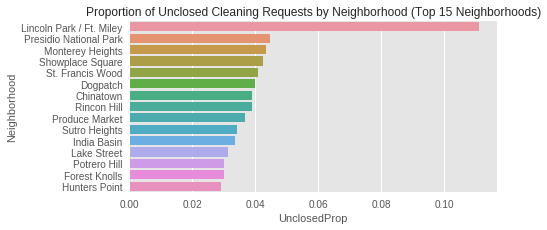

In [88]:
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(x = "UnclosedProp", 
                    y = "Neighborhood",
                    data = counts.sort_values(by = "UnclosedProp",
                                              ascending = False).head(15), 
                    kind = "bar", 
                    orient = "h", 
                    aspect = 2
                   )#, size = 10)
plt.title("Proportion of Unclosed Cleaning Requests by Neighborhood (Top 15 Neighborhoods)") 
plt.show()

Use supervisor district where there are too many neighborhoods. 

In [62]:
request_counts = street.groupby(by = "Request Type").count().reset_index().ix[:,["Request Type","CaseID"]].sort_values(by = "CaseID", ascending = False)
request_counts.head()

,Request Type,CaseID
1,Bulky Items,173877
5,General Cleaning,166806
15,Sidewalk_Cleaning,159118
6,Hazardous Materials,77074
7,Illegal Encampment,38863


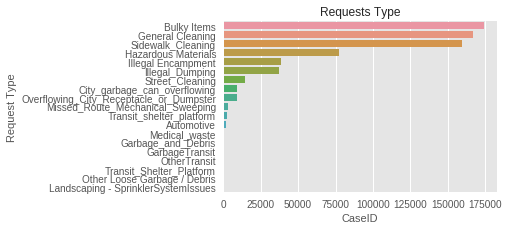

In [90]:
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.factorplot(y = "Request Type", 
                    x = "CaseID",
                    data = request_counts, 
                    kind = "bar", 
                    orient = "h", 
                    aspect = 2
                   )#, size = 10)
plt.title("Requests Type") 
plt.show()

Differences by time of year:
- Mattresses in summer  
- Holiday shopping  


Note: only use 2009 through 2016 to only count full years.  
Ask TA if we should do this for all analysis or just this part.

In [64]:
street['month'] = [timestamp.month for timestamp in street.Opened]

In [65]:
street.head()

,CaseID,Opened,Closed,Status,Responsible Agency,Address,Category,Request Type,Request Details,Source,Supervisor District,Neighborhood,Updated,Point,month
0,342509,2009-01-01 08:30:51,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of 13TH ST and FOLSOM ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Encampment,Voice In,6.0,Mission,2009-01-01 11:07:06,"(37.7695911772607, -122.415577110949)",1
1,342510,2009-01-01 08:33:46,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of 13TH ST and FOLSOM ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Debris_filled_carts,Voice In,6.0,Mission,2009-01-01 11:07:06,"(37.7695911772607, -122.415577110949)",1
2,342512,2009-01-01 08:44:54,2009-01-31 13:09:53,Closed,DPW Ops Queue,"467 FILLMORE ST, SAN FRANCISCO, CA, 94117",Street and Sidewalk Cleaning,Street_Cleaning,Glass,Voice In,5.0,Western Addition,2009-01-31 13:09:53,"(37.773807246, -122.431027495)",1
3,342514,2009-01-01 09:13:07,2009-01-01 11:07:06,Closed,DPW Ops Queue,Intersection of DWIGHT ST and GOETTINGEN ST,Street and Sidewalk Cleaning,Sidewalk_Cleaning,Garbage,Voice In,9.0,Excelsior,2009-01-01 11:07:06,"(37.7232896018615, -122.405086927628)",1
4,342519,2009-01-01 09:21:05,2009-01-21 06:07:13,Closed,DPW Ops Queue,"1610 MCALLISTER ST, SAN FRANCISCO, CA, 94115",Street and Sidewalk Cleaning,Sidewalk_Cleaning,Human_waste_or_urine,Voice In,5.0,Western Addition,2009-01-21 06:07:13,"(37.777956377, -122.43893262)",1


In [66]:
count_by_month = street.groupby(by='month').count().CaseID.reset_index()
count_by_month

,month,CaseID
0,1,57466
1,2,48871
2,3,50527
3,4,48875
4,5,52543
5,6,57559
6,7,60132
7,8,66023
8,9,64723
9,10,66142


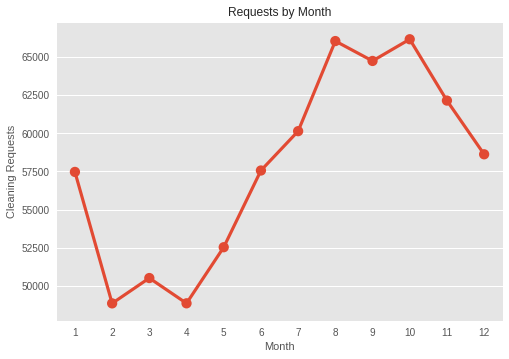

In [67]:
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.pointplot(y = "CaseID", 
                    x = "month",
                    data = count_by_month, 
                    kind = "bar", 
                    aspect = 3,
                   )#, size = 10)
ax.set_ylabel("Cleaning Requests")
ax.set_xlabel("Month")
plt.title("Requests by Month") 
plt.show()

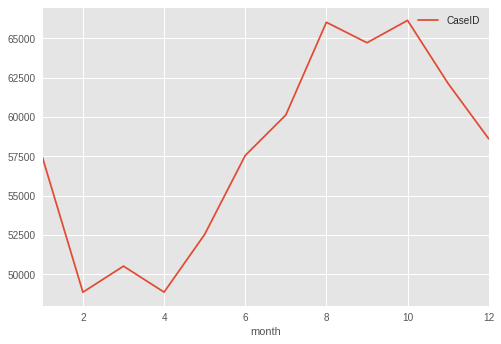

In [68]:
count_by_month.plot(y = "CaseID", 
                    x = "month")

Faster at closing requests by time?
Time to close requests by neighborhood?

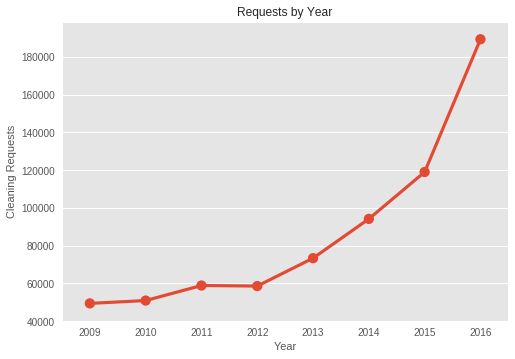

In [92]:
street['year'] = [timestamp.year for timestamp in street.Opened]
count_by_year = street.groupby(by='year').count().CaseID.reset_index()
sns.set_context("notebook", rc={"font.size" : 40}) # font_scale=1.5
ax = sns.pointplot(y = "CaseID", 
                    x = "year",
                    data = count_by_year, 
                    kind = "bar", 
                    aspect = 3,
                   )#, size = 10)
ax.set_ylabel("Cleaning Requests")
ax.set_xlabel("Year")
plt.title("Requests by Year") 
plt.show()

In [69]:
[(colname, len(street[colname].unique())) for colname in list(street)]

[('CaseID', 693612),
 ('Opened', 685180),
 ('Closed', 507615),
 ('Status', 2),
 ('Responsible Agency', 122),
 ('Address', 96438),
 ('Category', 1),
 ('Request Type', 20),
 ('Request Details', 126),
 ('Source', 7),
 ('Supervisor District', 14),
 ('Neighborhood', 125),
 ('Updated', 515053),
 ('Point', 102834),
 ('month', 12)]

In [70]:
by_month_req_type = street.groupby(by=['month','Request Type']).count().CaseID.reset_index()
by_month_req_type = by_month_req_type.sort_values(by = ['month', "CaseID"], ascending=[True,False])
by_month_req_type.head()

,month,Request Type,CaseID
4,1,General Cleaning,16201
11,1,Sidewalk_Cleaning,14339
1,1,Bulky Items,12222
5,1,Hazardous Materials,5376
7,1,Illegal_Dumping,3509


In [71]:
#by_month_req_type = street.groupby(by=['month','Request Type']).plot()


In [72]:
#street.groupby(by=['month','Request Type']).plot(y = 'CaseID', x = 'month')

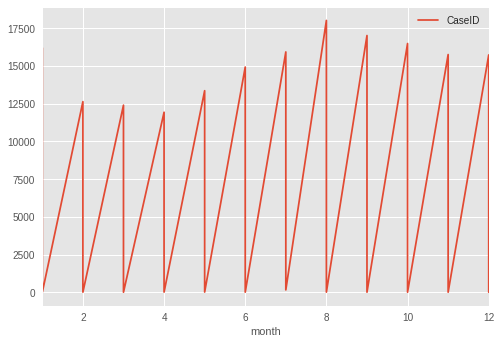

In [73]:
by_month_req_type.plot(y = 'CaseID', x = 'month')

# Scraping

In [74]:
requests_cache.install_cache('sf_cache')

In [75]:
url = "http://www.city-data.com/nbmaps/neigh-San-Francisco-California.html"
response = requests.get(url)
response.raise_for_status

neighborhoods_bs = BeautifulSoup(response.text, 'lxml')

neighborhood_names = neighborhoods_bs.find_all(name = "span", attrs={'class':'street-name'})

In [76]:
neighborhood_names = [name.text for name in neighborhood_names]

In [77]:
neighborhood_names

[u'Alamo Square',
 u'Anza Vista',
 u'Aquatic Park',
 u'Baja Noe',
 u'Balboa Park',
 u'Balboa Terrace',
 u'Bayview District',
 u'Bayview Heights',
 u'Bernal Heights',
 u'Bernal Heights North',
 u'Bernal Heights Park',
 u'Bernal Heights South',
 u'Buena Vista Park',
 u'Castro',
 u'Cathedral Hill',
 u'Cayuga Terrace',
 u'Central Richmond',
 u'Central Sunset',
 u'Chinatown',
 u'Civic Center',
 u'Clarendon Heights',
 u'Cole Valley',
 u'Corona Heights',
 u'Cow Hollow',
 u'Crocker-Amazon',
 u'Deco Ghetto',
 u'Diamond Heights',
 u'Dogpatch',
 u'Downtown',
 u'Duboce Triangle',
 u'Embarcadero',
 u'Excelsior',
 u'Financial District',
 u'Financial District South',
 u"Fisherman's Wharf",
 u'Forest Hill',
 u'Forest Knolls',
 u'Fort Mason',
 u'French Quarter',
 u'Ghirardelli Square',
 u'Glen Park',
 u'Golden Gate Heights',
 u'Golden Gate Park',
 u'Haight-Ashbury',
 u'Hayes Valley',
 u'Holly Park',
 u'Hunters Point',
 u'India Basin',
 u'Ingleside',
 u'Ingleside Heights',
 u'Ingleside Terrace',
 u'Inne

In [78]:
neighborhood_divs = neighborhoods_bs.body.find_all(name = "div", attrs={'class':'neighborhood'})

In [79]:
neighborhood_divs[0].text

u"Alamo Square neighborhood in San Francisco statistics: (Find on map)\nArea: 0.144 square milesPopulation: 6,379Population density:Alamo Square:44,418 people per square mileSan Francisco:18,521 people per square mileMedian household income in 2015: Alamo Square:$93,901San Francisco:$92,094Median rent in in 2015: Alamo Square:$1,754San Francisco:$1,609Male vs FemalesMales:3,916Females:2,461Median ageMales:35.4 yearsFemales:38.6 yearsHousing prices:Average estimated value of detached houses in 2015 (4.9% of all units):Alamo Square:$1,988,926San Francisco:$1,134,589Average estimated value of townhouses or other attached units in 2015 (1.6% of all units):This neighborhood:$948,534city:$846,333Average estimated value of housing units in 2-unit structures in 2015 (9.8% of all units):This neighborhood:$1,003,276San Francisco:$1,001,026Average estimated '15 value of housing units in 3-to-4-unit structures (26.8% of all units):Alamo Square:$736,205city:$984,108Average estimated '15 value of ho

regular expressions
[capital letter][lowercase][:][ ][numbers or , or $]

In [80]:
neighborhood_divs[0].find_all(name = "b")

[<b>Area:</b>,
 <b>square miles</b>,
 <b>Population:</b>,
 <b>Population density:</b>,
 <b>Alamo Square:</b>,
 <b>people per square mile</b>,
 <b>San Francisco:</b>,
 <b>people per square mile</b>,
 <b>Median household income in 2015: </b>,
 <b>Alamo Square:</b>,
 <b>San Francisco:</b>,
 <b>Median rent in in 2015: </b>,
 <b>Alamo Square:</b>,
 <b>San Francisco:</b>,
 <b>Male vs Females</b>,
 <b>Males:</b>,
 <b>Females:</b>,
 <b>Median age</b>,
 <b>Males:</b>,
 <b>Females:</b>,
 <b>Housing prices:</b>,
 <b>Average estimated value of detached houses in 2015 </b>,
 <b>:</b>,
 <b>Alamo Square:</b>,
 <b>San Francisco:</b>,
 <b>Average estimated value of townhouses or other attached units in 2015 </b>,
 <b>:</b>,
 <b>This neighborhood:</b>,
 <b>city:</b>,
 <b>Average estimated value of housing units in 2-unit structures in 2015 </b>,
 <b>:</b>,
 <b>This neighborhood:</b>,
 <b>San Francisco:</b>,
 <b>Average estimated '15 value of housing units in 3-to-4-unit structures </b>,
 <b>:</b>,
 <b>A

In [81]:
neighborhood_divs[0].contents

[<strong><span class="street-name">Alamo Square</span> neighborhood in San Francisco statistics: </strong>,
 u'(',
 <a href="javascript:sm(103);">Find on map</a>,
 u')',
 <br/>,
 <br/>,
 u'\n',
 <b>Area:</b>,
 u' 0.144 ',
 <b>square miles</b>,
 <br/>,
 <br/>,
 <b>Population:</b>,
 u' 6,379',
 <br/>,
 <br/>,
 <b>Population density:</b>,
 <br/>,
 <div class="hgraph"><table><tr><td><b>Alamo Square:</b></td><td><p class="h" style="padding-left:150px;"></p>44,418 <b>people per square mile</b></td></tr><tr><td><b>San Francisco:</b></td><td><p class="a" style="padding-left:62px;"></p>18,521 <b>people per square mile</b></td></tr></table></div>,
 <br/>,
 <b>Median household income in 2015: </b>,
 <br/>,
 <div class="hgraph"><table><tr><td><b>Alamo Square:</b></td><td><p class="h" style="padding-left:150px;"></p>$93,901</td></tr><tr><td><b>San Francisco:</b></td><td><p class="a" style="padding-left:147px;"></p>$92,094</td></tr></table></div>,
 <br/>,
 <b>Median rent in in 2015: </b>,
 <br/>,
 <

In [82]:
type(neighborhood_divs[0].contents[1])

bs4.element.NavigableString

Loop through contents  
if a navigable string can be converted to int,  
then grab it and the first <b> that precedes it  

In [83]:
neighborhood_divs[0].strings

<generator object _all_strings at 0x7fb77bdea6e0>

In [84]:
# Add to a list of strings
strings = []

for descendant in neighborhood_divs[0].strings:
    strings.append(descendant)
    
strings

[u'Alamo Square',
 u' neighborhood in San Francisco statistics: ',
 u'(',
 u'Find on map',
 u')',
 u'\n',
 u'Area:',
 u' 0.144 ',
 u'square miles',
 u'Population:',
 u' 6,379',
 u'Population density:',
 u'Alamo Square:',
 u'44,418 ',
 u'people per square mile',
 u'San Francisco:',
 u'18,521 ',
 u'people per square mile',
 u'Median household income in 2015: ',
 u'Alamo Square:',
 u'$93,901',
 u'San Francisco:',
 u'$92,094',
 u'Median rent in in 2015: ',
 u'Alamo Square:',
 u'$1,754',
 u'San Francisco:',
 u'$1,609',
 u'Male vs Females',
 u'Males:',
 u'3,916',
 u'Females:',
 u'2,461',
 u'Median age',
 u'Males:',
 u'35.4 years',
 u'Females:',
 u'38.6 years',
 u'Housing prices:',
 u'Average estimated value of detached houses in 2015 ',
 u'(4.9% of all units)',
 u':',
 u'Alamo Square:',
 u'$1,988,926',
 u'San Francisco:',
 u'$1,134,589',
 u'Average estimated value of townhouses or other attached units in 2015 ',
 u'(1.6% of all units)',
 u':',
 u'This neighborhood:',
 u'$948,534',
 u'city:',

In [85]:
#contents = neighborhood_divs[0].contents

value_dict_list = []

# Replace $
for i in range(1, len(strings)):
    if len(strings[i]) > 0:
        if strings[i][0] == '$':
            strings[i] = strings[i][1:]
        # remove commas and whitespace
        strings[i] = strings[i].replace(',', '').strip()

        try:
            value = float(strings[i])
            try:
                # what the value refers to
                what_value_is = strings[i - 1]
                
                # units
                if strings[i + 1][-1] != ":":
                    units = strings[i + 1]
                else:
                    units = ""
                
                value_dict = {"value": value,
                              "what_value_is": what_value_is,
                              "units": units}
                
                value_dict_list.append(value_dict)
                
            except:
                print "bad idea"

        except ValueError:
            continue
            
value_dict_list

[{'units': u'square miles', 'value': 0.144, 'what_value_is': u'Area:'},
 {'units': '', 'value': 6379.0, 'what_value_is': u'Population:'},
 {'units': u'people per square mile',
  'value': 44418.0,
  'what_value_is': u'Alamo Square:'},
 {'units': u'people per square mile',
  'value': 18521.0,
  'what_value_is': u'San Francisco:'},
 {'units': '', 'value': 93901.0, 'what_value_is': u'Alamo Square:'},
 {'units': u'Median rent in in 2015: ',
  'value': 92094.0,
  'what_value_is': u'San Francisco:'},
 {'units': '', 'value': 1754.0, 'what_value_is': u'Alamo Square:'},
 {'units': u'Male vs Females',
  'value': 1609.0,
  'what_value_is': u'San Francisco:'},
 {'units': '', 'value': 3916.0, 'what_value_is': u'Males:'},
 {'units': u'Median age', 'value': 2461.0, 'what_value_is': u'Females:'},
 {'units': '', 'value': 1988926.0, 'what_value_is': u'Alamo Square:'},
 {'units': u'Average estimated value of townhouses or other attached units in 2015 ',
  'value': 1134589.0,
  'what_value_is': u'San Franc

In [86]:
strings

[u'Alamo Square',
 u'neighborhood in San Francisco statistics:',
 u'(',
 u'Find on map',
 u')',
 u'',
 u'Area:',
 u'0.144',
 u'square miles',
 u'Population:',
 u'6379',
 u'Population density:',
 u'Alamo Square:',
 u'44418',
 u'people per square mile',
 u'San Francisco:',
 u'18521',
 u'people per square mile',
 u'Median household income in 2015:',
 u'Alamo Square:',
 u'93901',
 u'San Francisco:',
 u'92094',
 u'Median rent in in 2015:',
 u'Alamo Square:',
 u'1754',
 u'San Francisco:',
 u'1609',
 u'Male vs Females',
 u'Males:',
 u'3916',
 u'Females:',
 u'2461',
 u'Median age',
 u'Males:',
 u'35.4 years',
 u'Females:',
 u'38.6 years',
 u'Housing prices:',
 u'Average estimated value of detached houses in 2015',
 u'(4.9% of all units)',
 u':',
 u'Alamo Square:',
 u'1988926',
 u'San Francisco:',
 u'1134589',
 u'Average estimated value of townhouses or other attached units in 2015',
 u'(1.6% of all units)',
 u':',
 u'This neighborhood:',
 u'948534',
 u'city:',
 u'846333',
 u'Average estimated 

In [87]:
int("9,999")

ValueError: invalid literal for int() with base 10: '9,999'